In [1]:
import mne
mne.set_log_level('error')
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# List with the ID of each participant
participants = [_ for _ in range(1,110)]

# List with the 14 experimet runs each participant did
run = [_ for _ in range(1,15)]  

# Creating a dictonary containing the raw data of a specific participant
participant = participants[16]
dic_runs = {}
for _ in run:
    file_path = f'files/S{participant:03}/S{participant:03}R{_:02}.edf'
    dic_runs[f'raw{_}'] = mne.io.read_raw_edf(file_path)

In [3]:
# Dictionary with the structure old_name : correct_cases_name. To respect the upper and lower cases of the standard notation for the electrde's position.
replacement = {
    'Fc': 'FC',
    'Cp': 'CP',
    'Af': 'AF',
    'Ft': 'FT',
    'Tp': 'TP',
    'Po': 'PO'   
}

# new_name is the dictionary to use to cange the name of the electrode's positions to respect the usual sandard notataions.
# First get rid of the excessive "." 
new_names = {
    name : name.replace(".", "") for name in dic_runs['raw1'].info['ch_names']
}

# Change the lower and upper case of the electrode's names
for key in new_names.keys():
    for old_string, new_string in replacement.items():
        new_names[key] = new_names[key].replace(old_string, new_string)

# Choose the montage and set it for the uploaded data
montage = 'standard_1020'
for _ in run:
        dic_runs[f'raw{_}'].rename_channels(new_names)
        dic_runs[f'raw{_}'].set_montage(montage)

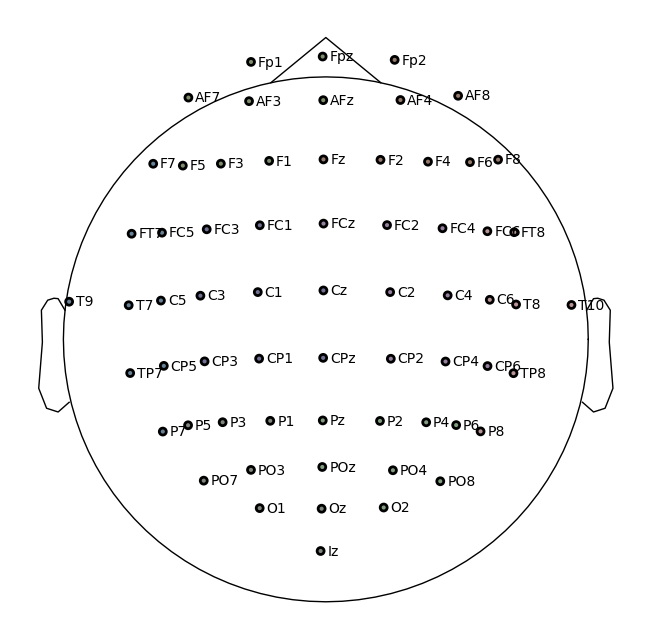

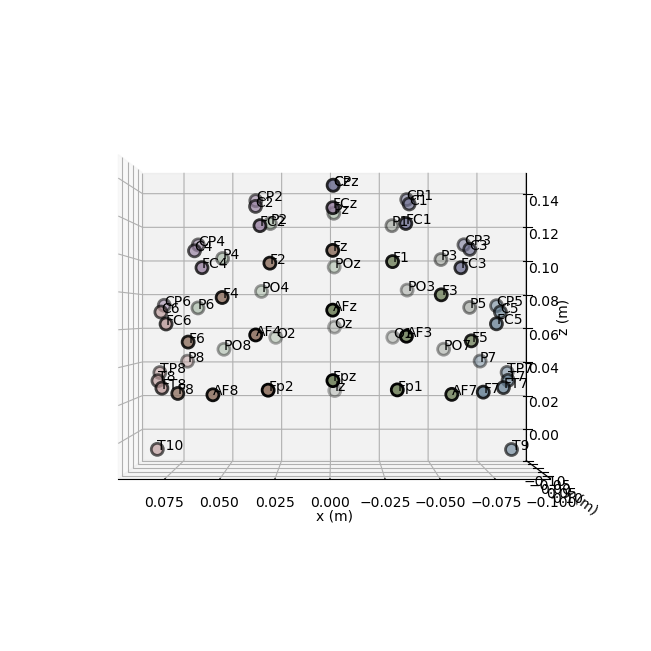

In [4]:
#  Show the placement of the electrodes
dic_runs['raw3'].info.plot_sensors(ch_type = 'eeg', show_names=True, ch_groups='position')
dic_runs['raw1'].info.plot_sensors(kind = "3d", ch_type = 'eeg', show_names=True, ch_groups='position')
plt.show()



In [5]:
# Filter setting
low_cut = 0.1
high_cut = 30

# copy the raw data and apply the filter
raw_filt = dic_runs['raw3'].load_data().copy().filter(low_cut, high_cut)

c:\Users\Stagiaire\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


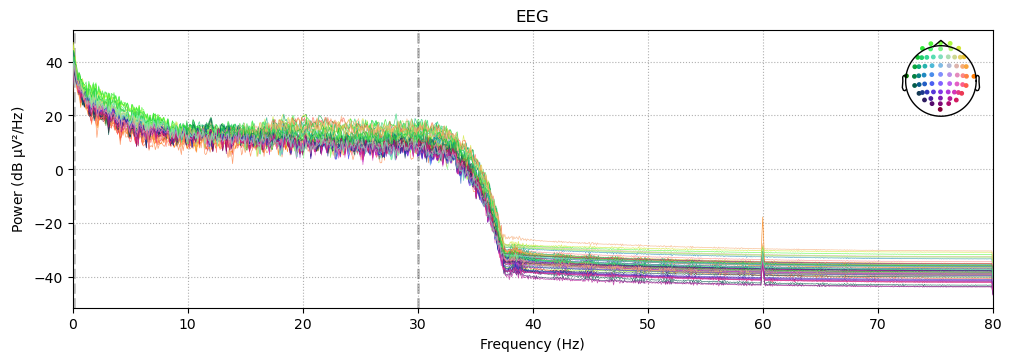

In [ ]:
# Plot the power graph of the raw data filtered
raw_filt.compute_psd().plot()
plt.show()

# ICA

In [6]:
# Filter settings for ICA
ica_low_cut = 1.0
high_cut = 30

raw_ica = dic_runs['raw3'].copy().filter(ica_low_cut, high_cut)

In [7]:
time_step = 1.0
events_ica = mne.make_fixed_length_events(raw_ica, duration=time_step)
epochs_ica = mne.Epochs(raw_ica, events_ica,
                        tmin=0.0, tmax=time_step,
                        baseline=None,
                        preload=True)

In [8]:
dic_runs['raw3'].info

<Info | 9 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: 3 items (dict)
>

In [9]:
epochs_ica

<Epochs | 122 events (all good), 0 – 1 s (baseline off), ~9.7 MB, data loaded,
 '1': 122>

In [10]:
epochs_ica.plot()

In [12]:
from autoreject import AutoReject

ar = AutoReject(n_interpolate=[1, 2, 4],
                random_state=42,
                picks=mne.pick_types(epochs_ica.info, 
                                     eeg=True,
                                     eog=False
                                    ),
                n_jobs=-1, 
                verbose=False
                )

ar.fit(epochs_ica)

reject_log = ar.get_reject_log(epochs_ica)

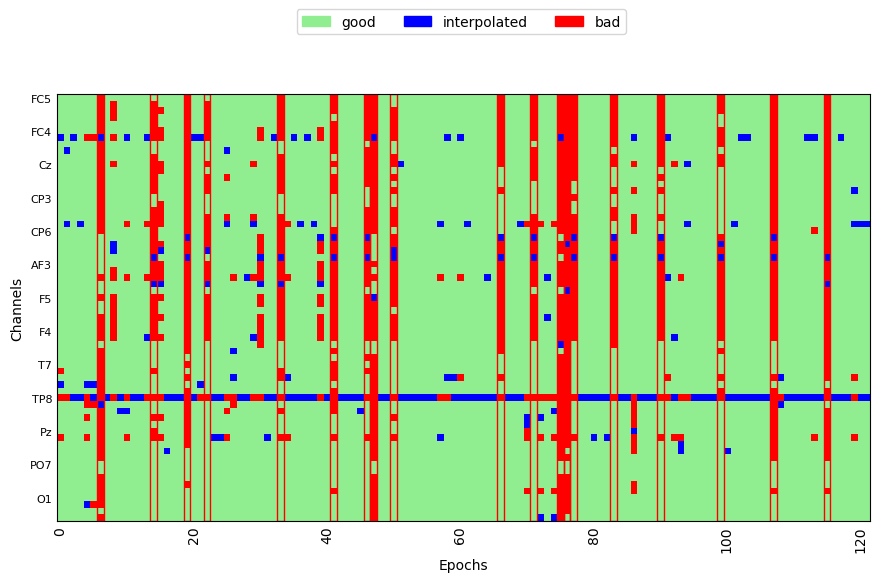

In [13]:
reject_log.plot('horizontal')
plt.show()

In [14]:
# ICA parameters
random_state = 42   # ensures ICA is reproducible each time it's run
ica_n_components = .99     # Specify n_components as a decimal to set % explained variance

# Fit ICA
ica = mne.preprocessing.ICA(n_components=ica_n_components,
                            random_state=random_state,
                            )
ica.fit(epochs_ica[~reject_log.bad_epochs], decim=3)

/home/elia/anaconda3/envs/mne/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


<ICA | epochs decomposition, method: fastica (fit in 1000 iterations on 5562 samples), 40 ICA components (64 PCA components available), channel types: eeg, no sources marked for exclusion>

/home/elia/anaconda3/envs/mne/lib/python3.12/site-packages/mne/viz/ica.py:173: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize, facecolor=[0.95] * 3)


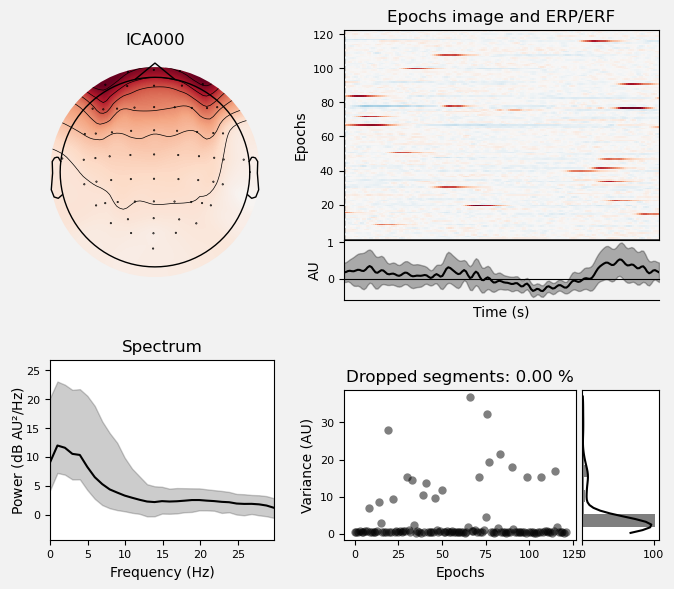

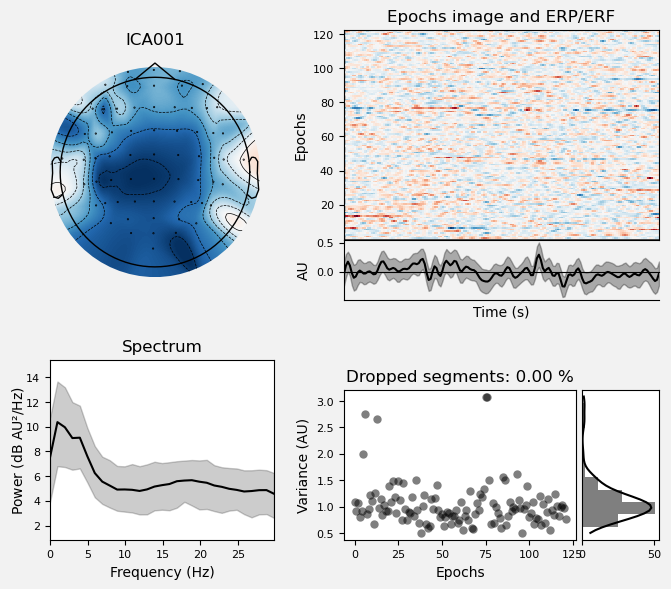

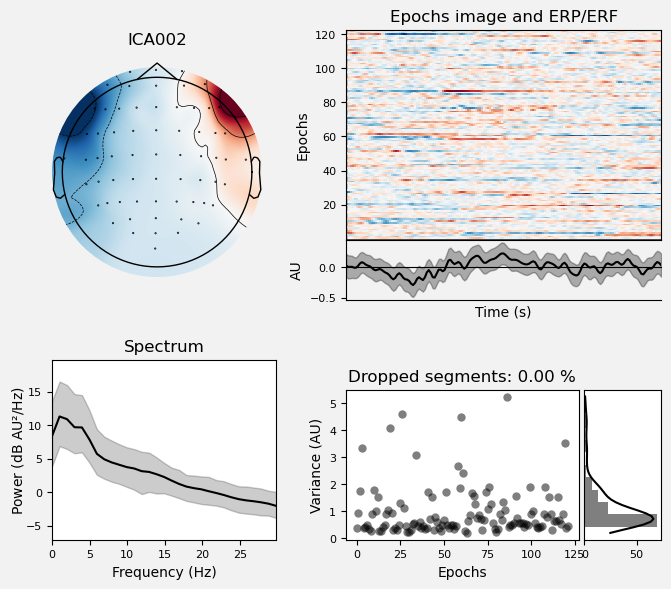

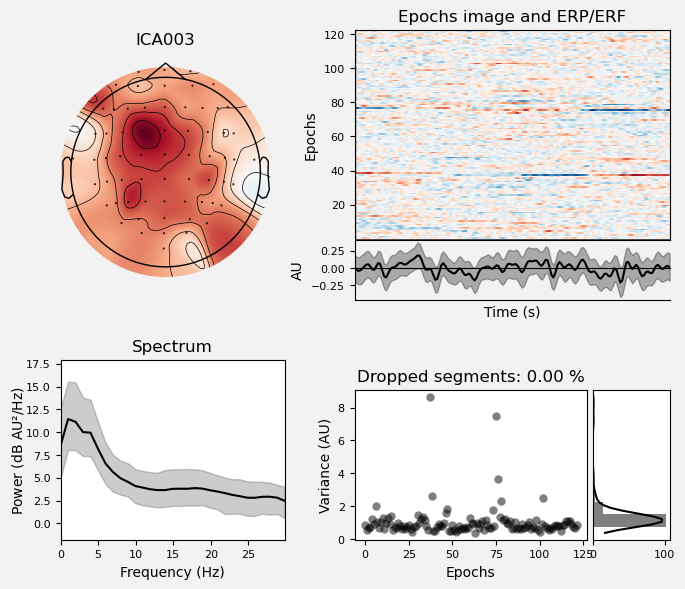

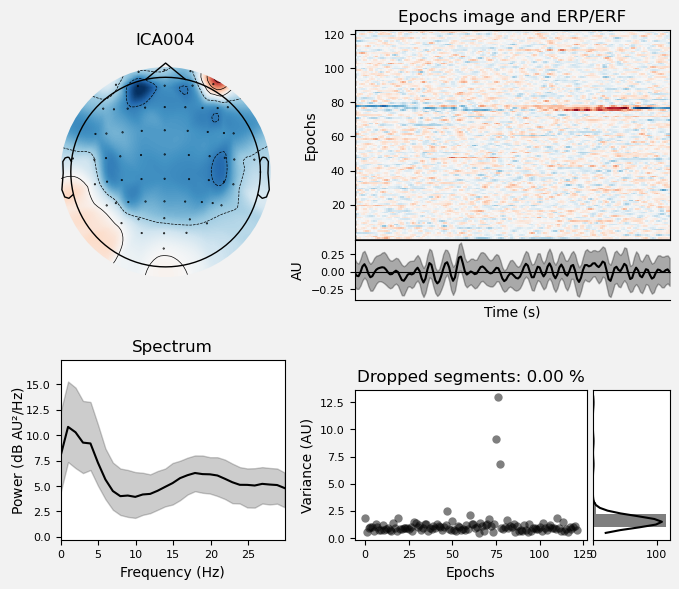

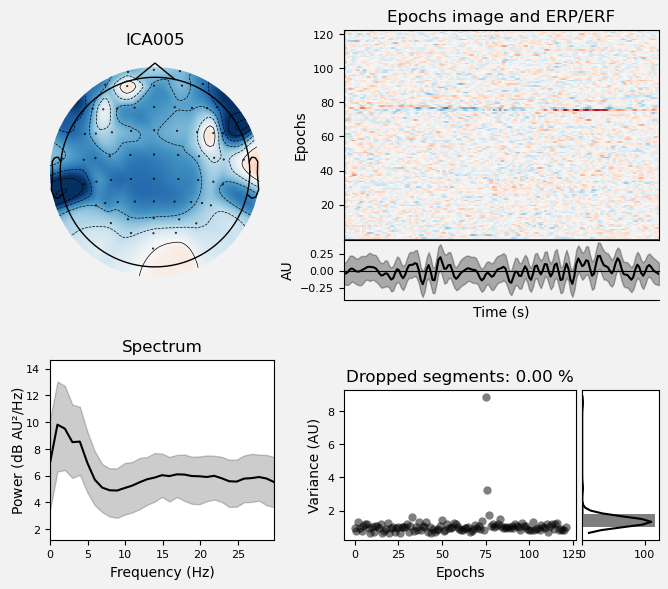

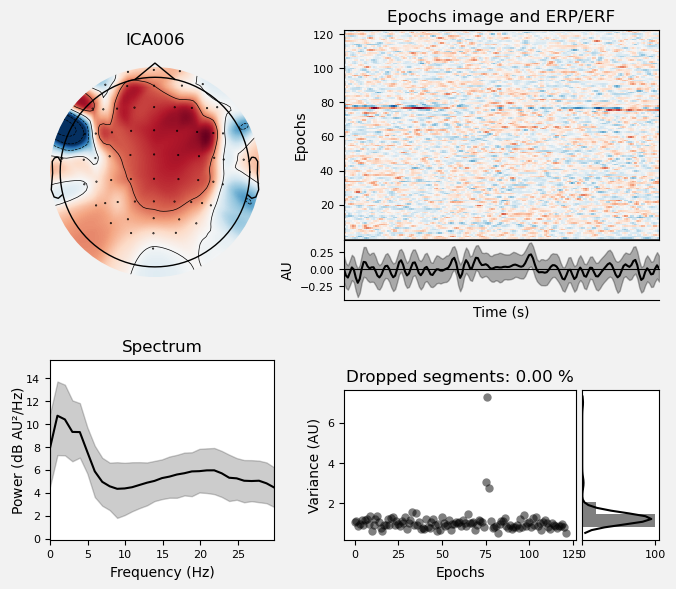

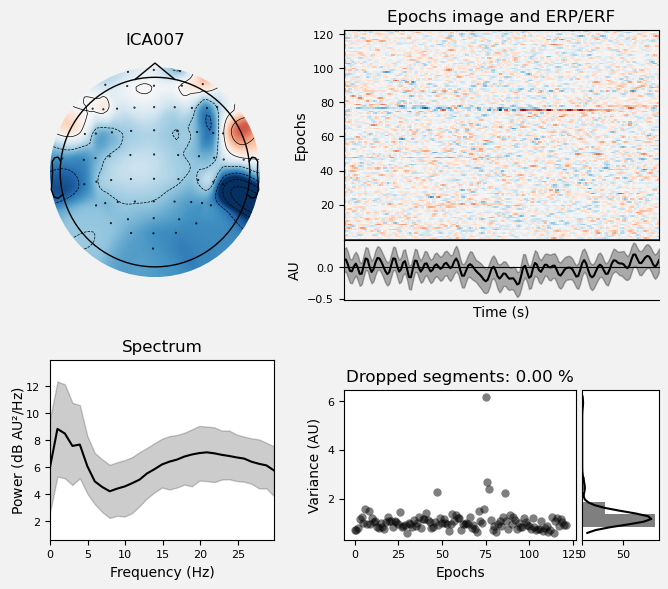

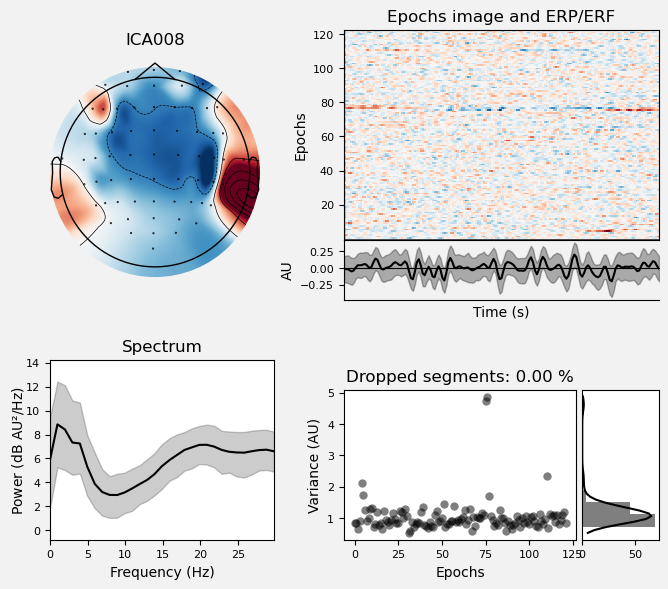

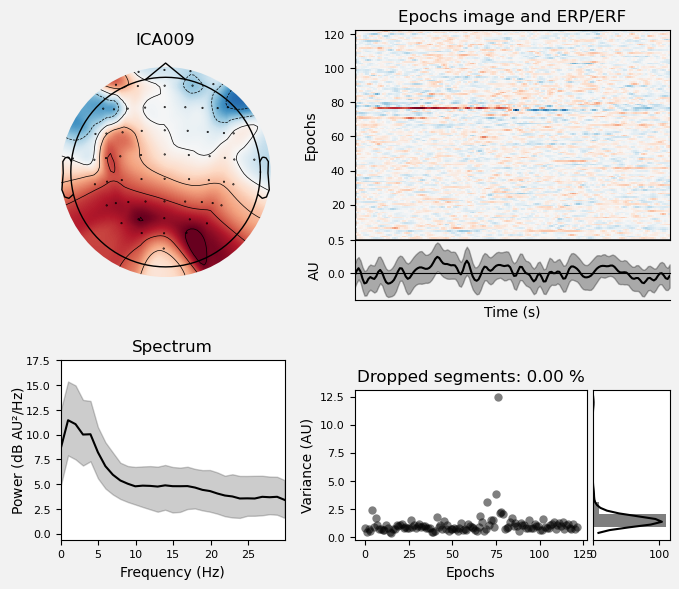

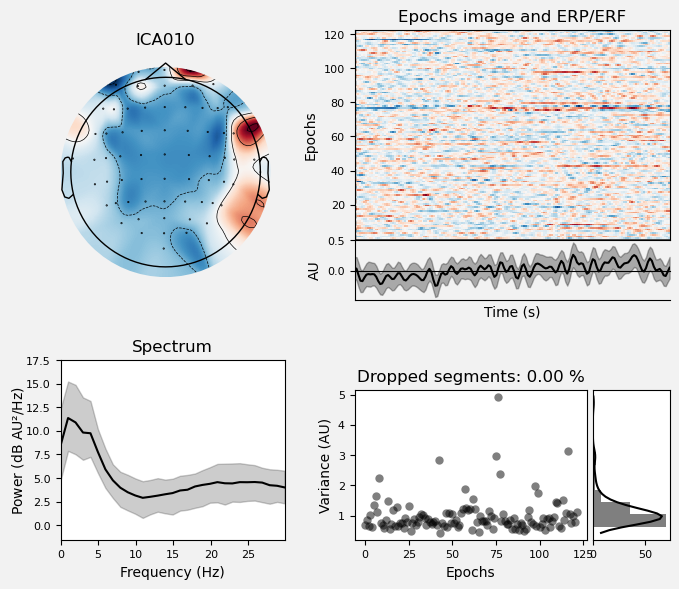

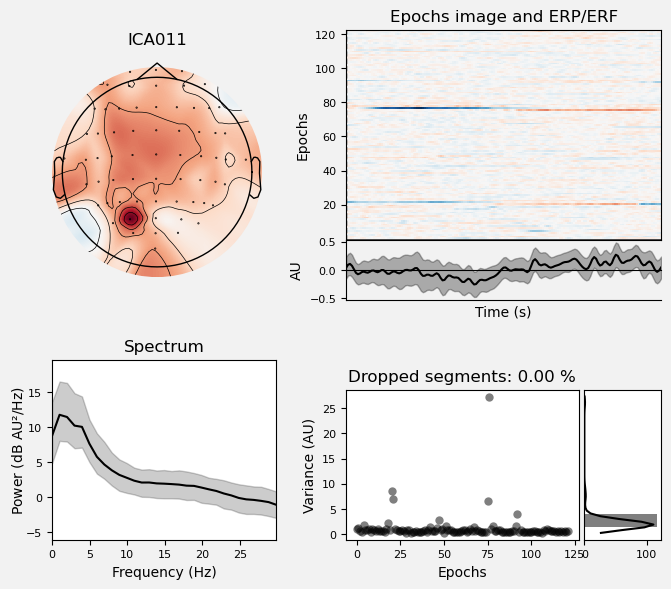

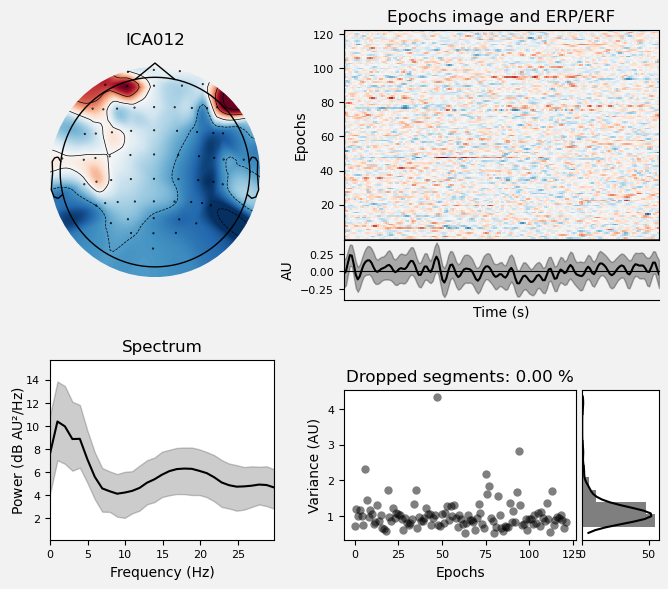

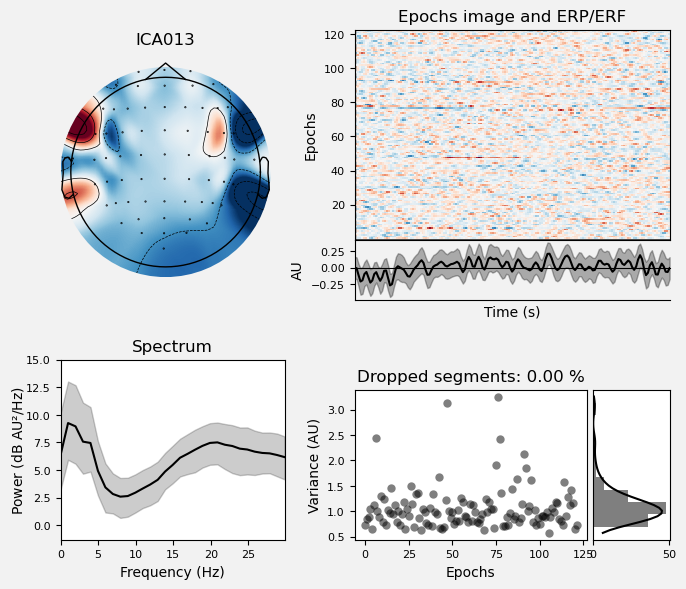

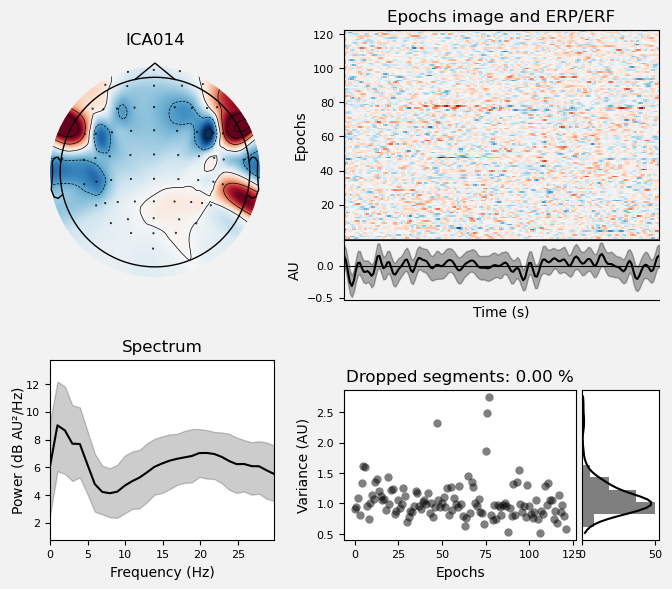

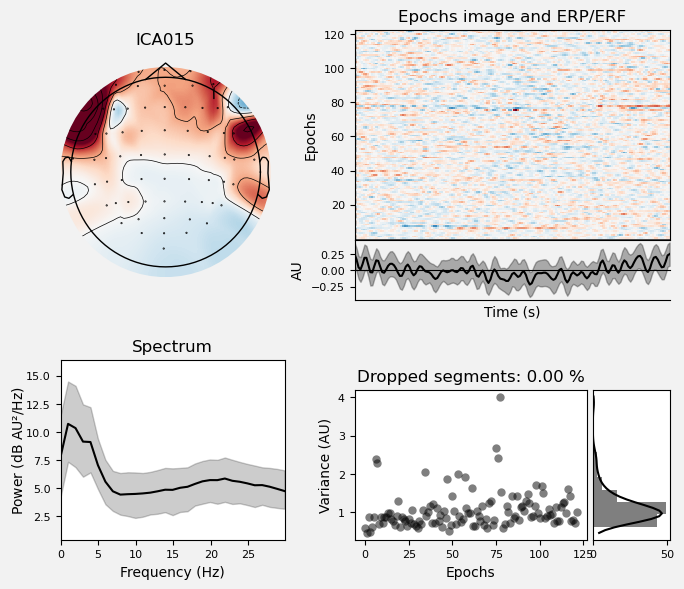

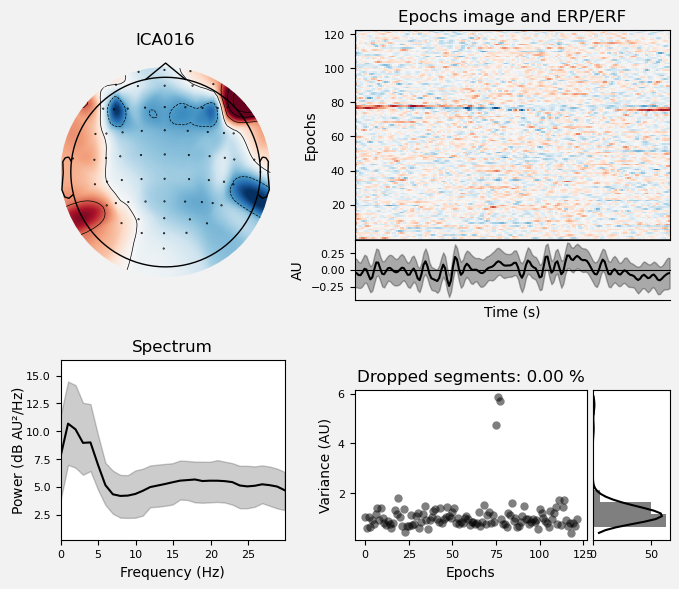

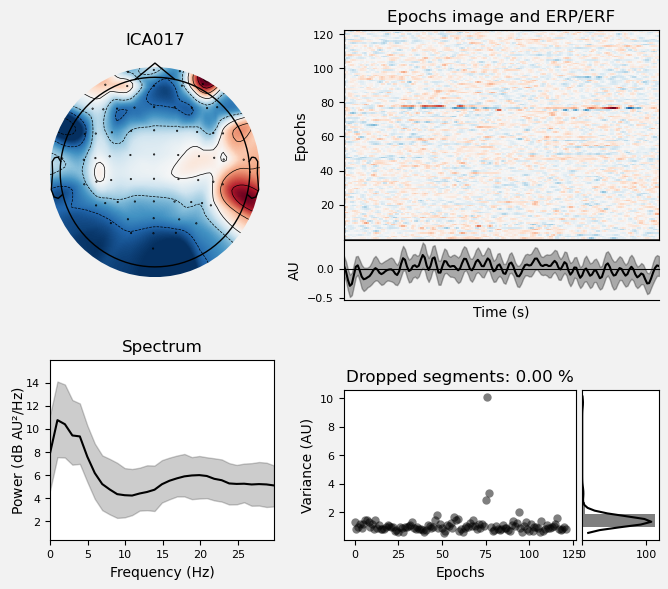

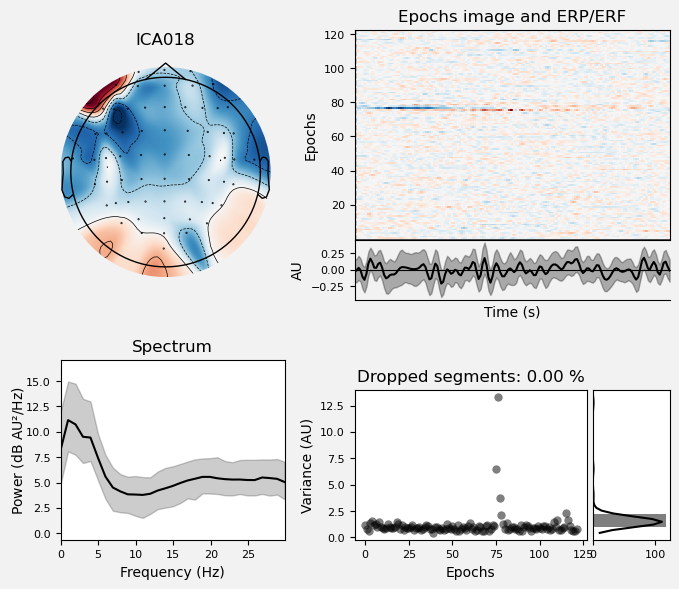

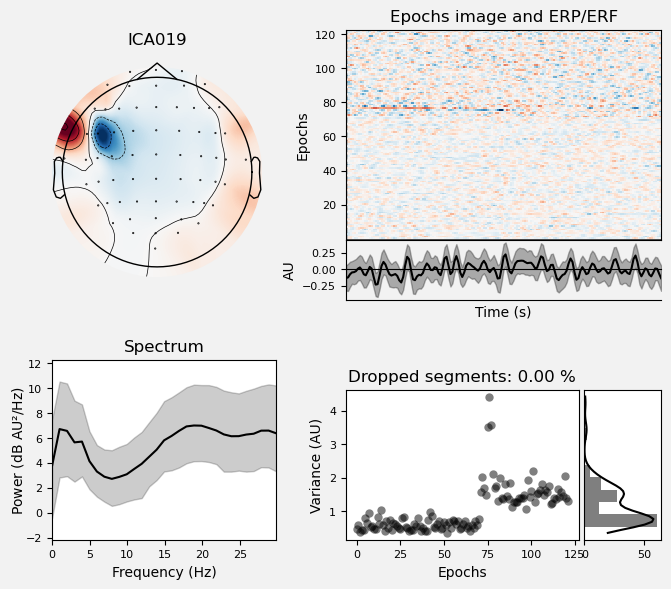

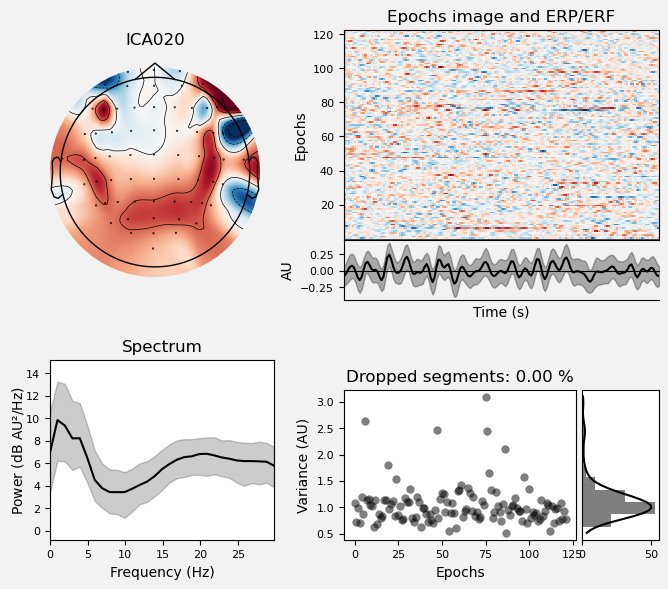

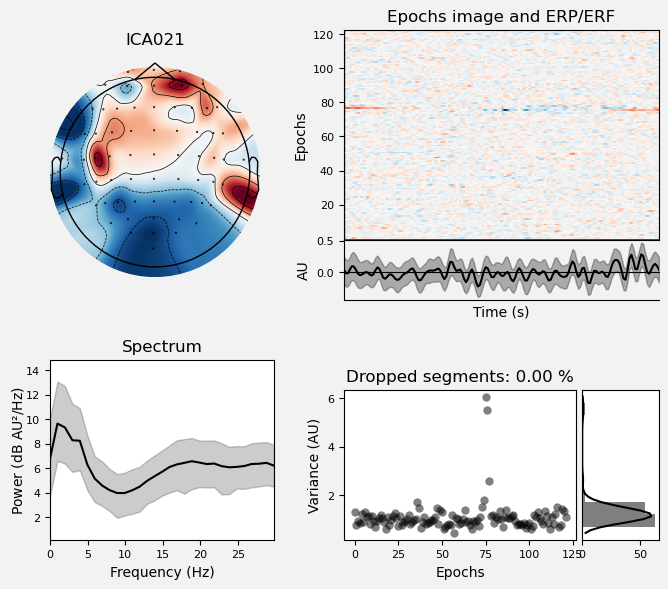

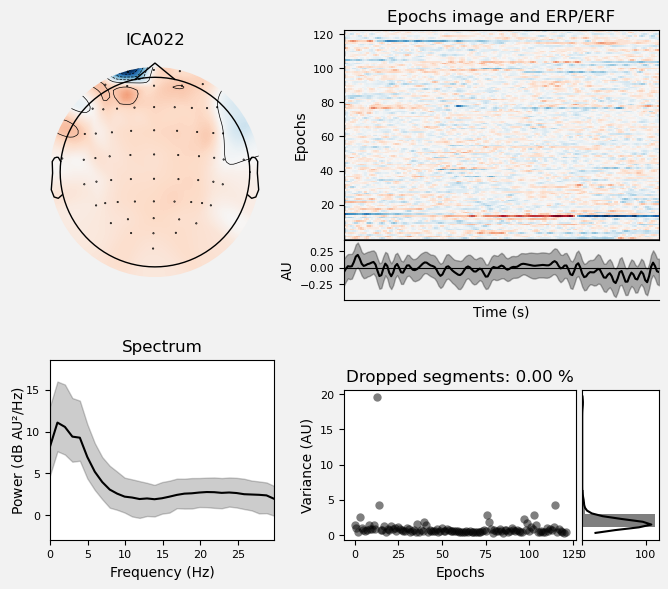

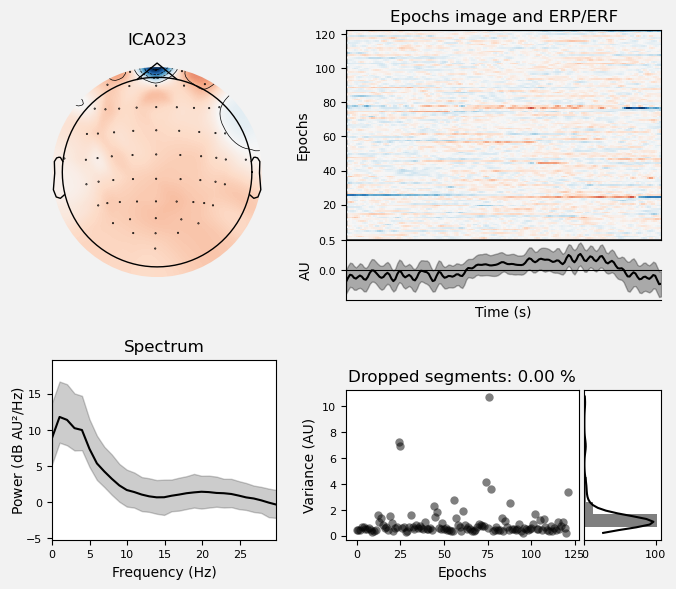

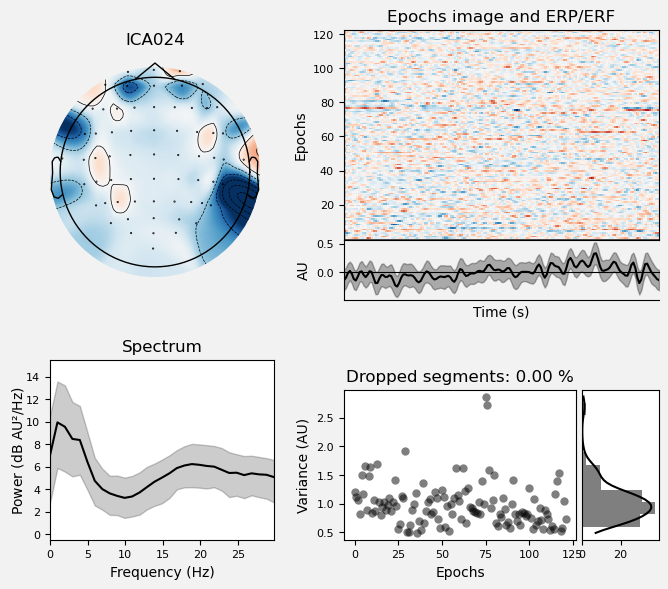

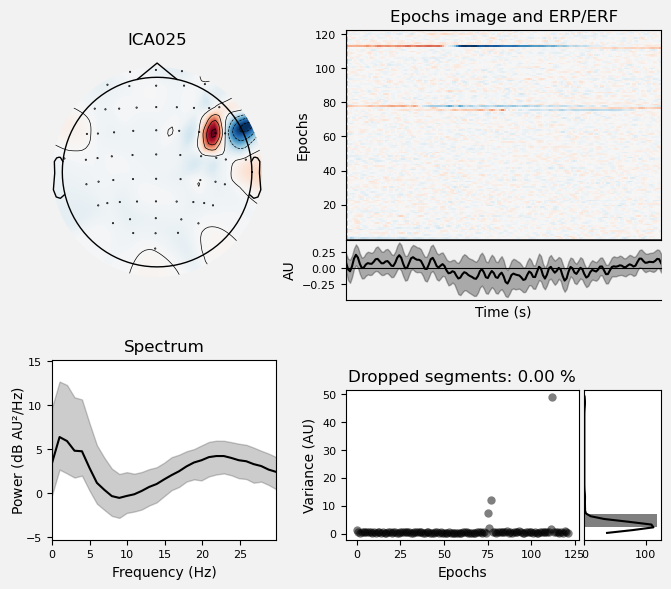

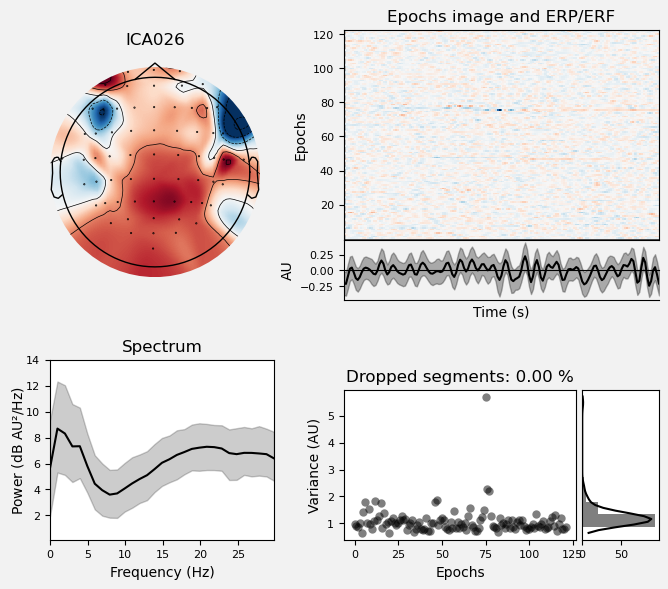

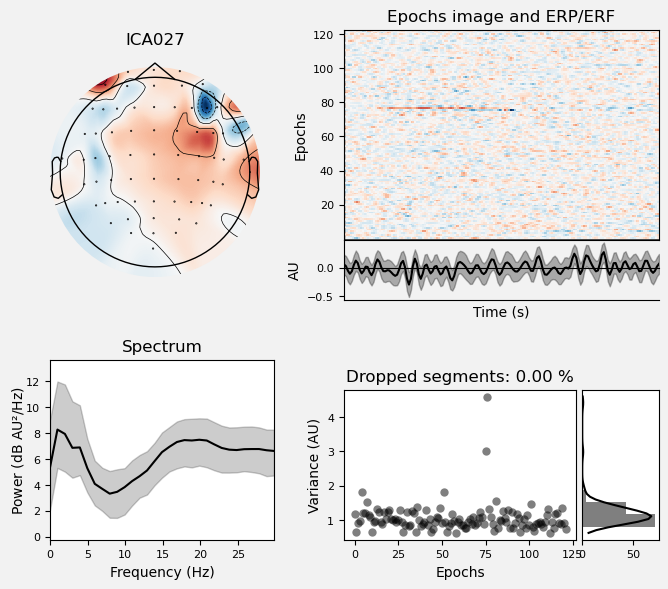

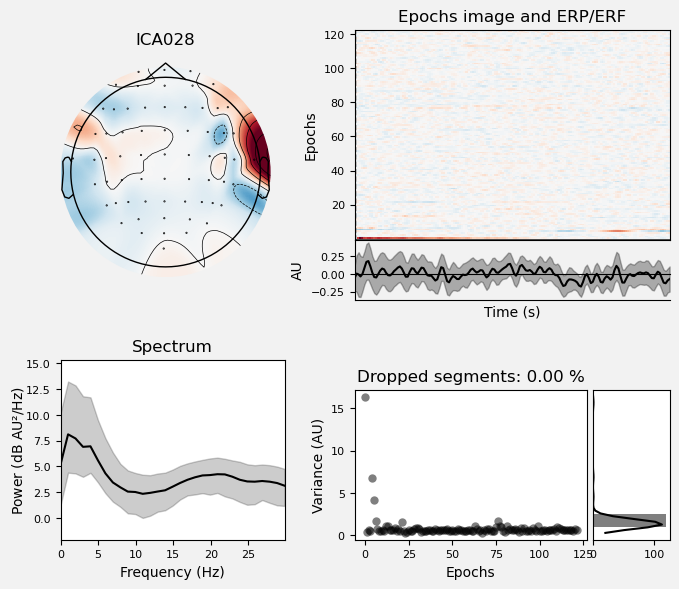

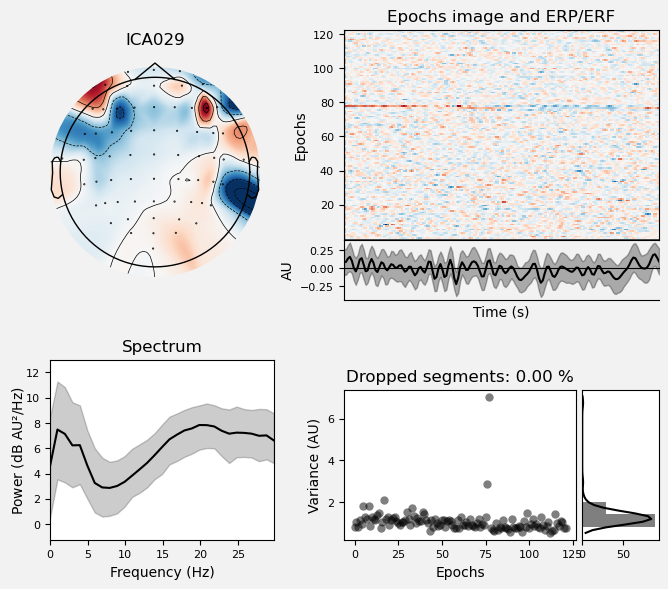

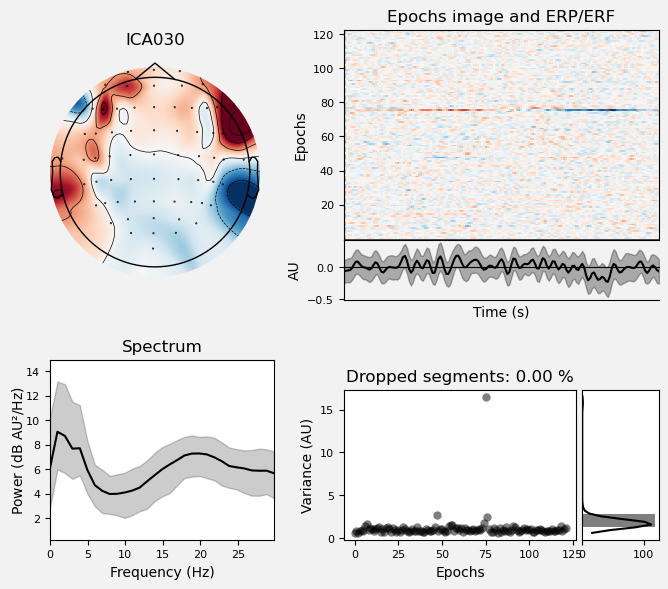

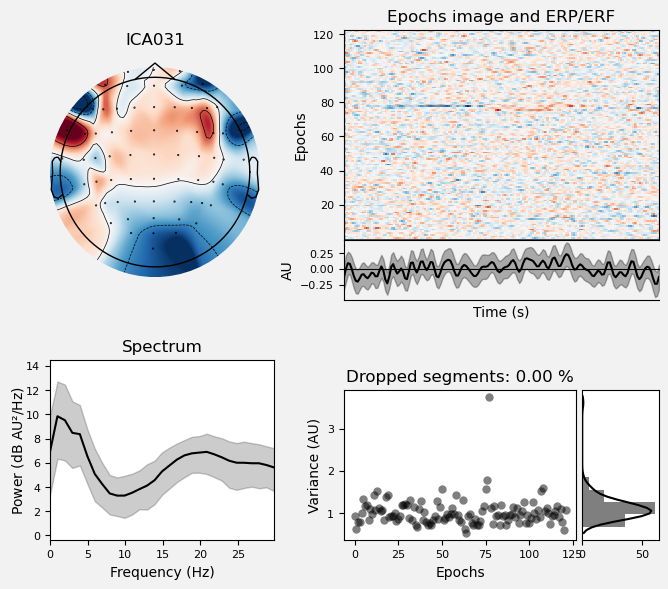

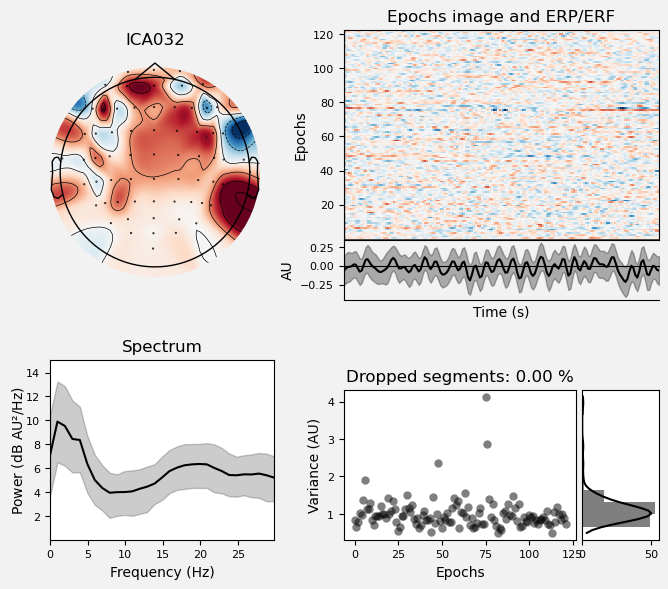

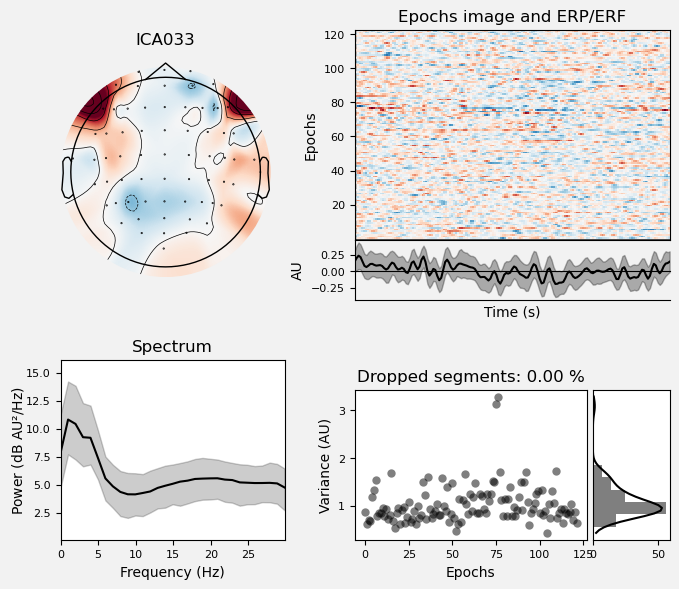

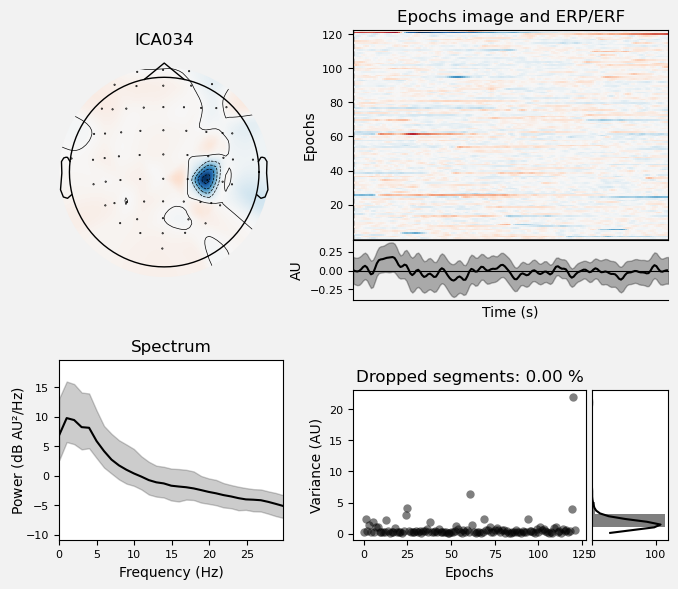

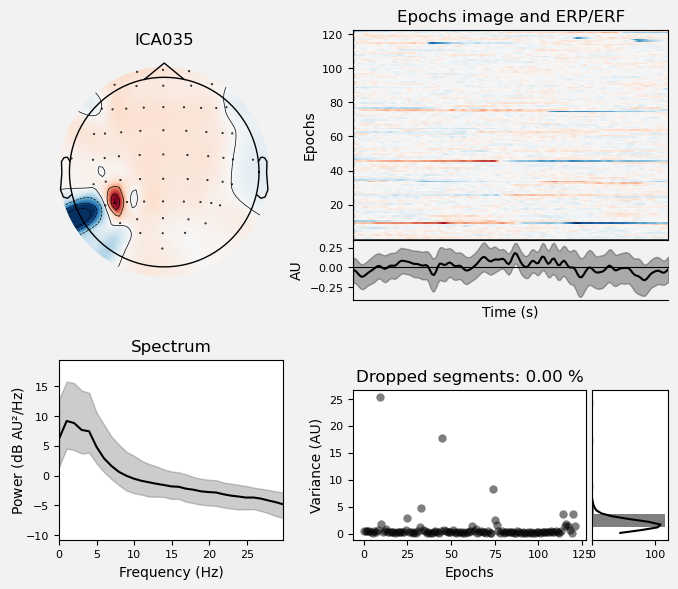

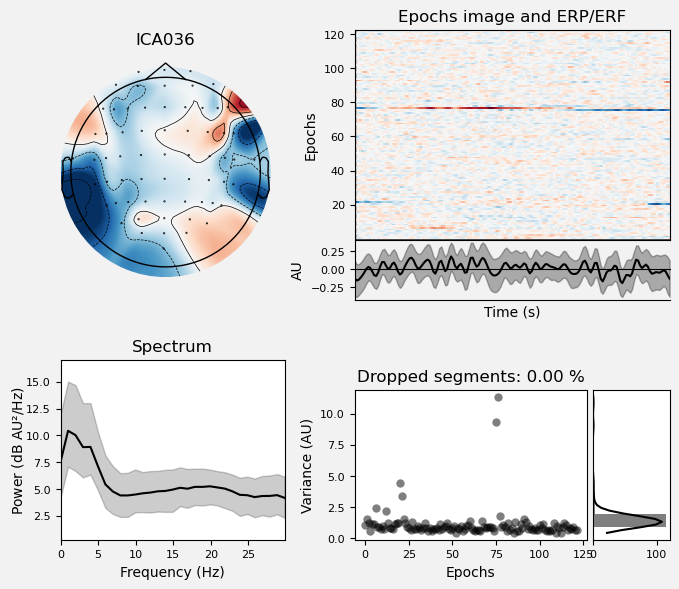

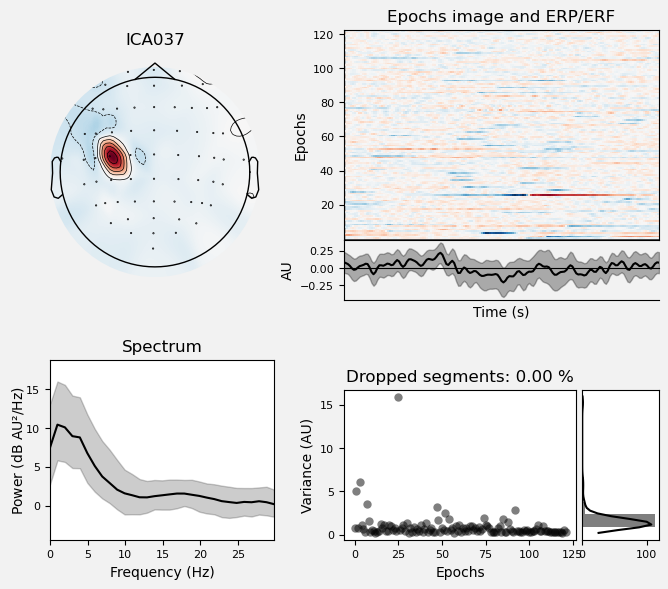

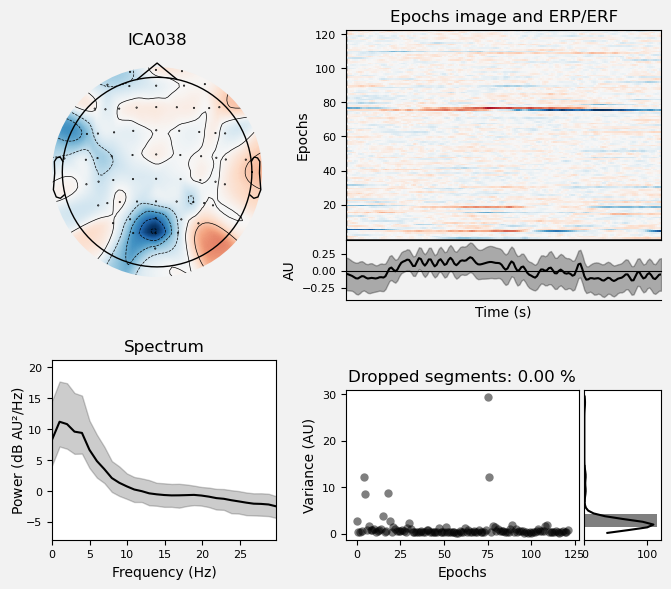

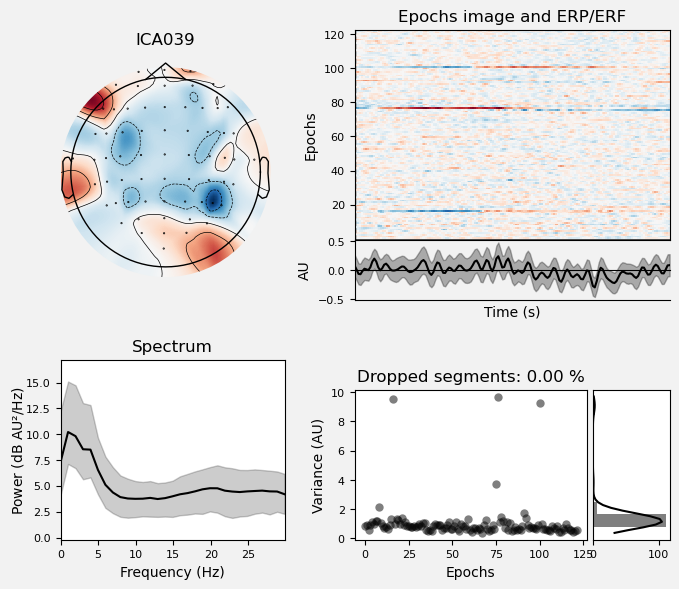

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6

In [15]:
ica.plot_properties(epochs_ica, picks=range(0, ica.n_components_), psd_args={'fmax': high_cut})